In [1]:
import os
import tensorflow as tf
import numpy as np

# Define the augmented dataset path
augmented_dataset_path = "C:/Users/kulve/Downloads/deep learning project/generated_images"
test_dataset= "C:/Users/kulve/Downloads/deep learning project/testimages"

# Preprocessing function: Normalize and resize
def preprocess_images(image_batch, target_size=(128, 128)):
    """
    Normalize and resize a batch of images.
    Args:
        image_batch: Batch of images to preprocess.
        target_size: Tuple indicating the desired image size.
    Returns:
        Preprocessed image batch.
    """
    processed_images = []
    for img in image_batch:
        # Normalize to [0, 1] range if not already done
        img = img / 255.0 if tf.reduce_max(img) > 1 else img
        # Resize to the target size
        img = tf.image.resize(img, target_size).numpy()
        processed_images.append(img)
    return np.array(processed_images)

# Load the augmented dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    augmented_dataset_path,
    label_mode=None,
    image_size=(64, 64),  # Original image size
    batch_size=32
)

# Apply preprocessing (in-memory)
target_size = (128, 128)
preprocessed_batches = []
for batch in dataset:
    preprocessed_batch = preprocess_images(batch, target_size=target_size)
    preprocessed_batches.append(preprocessed_batch)

# Convert to a single numpy array for further use
preprocessed_dataset = np.vstack(preprocessed_batches)

print(f"Preprocessing completed. Preprocessed dataset shape: {preprocessed_dataset.shape}")


Found 1000 files.
Preprocessing completed. Preprocessed dataset shape: (1000, 128, 128, 3)


In [2]:
# Preprocessing function: Normalize and resize
def preprocess_images(image_batch, target_size=(128, 128)):
    """
    Normalize and resize a batch of images.
    Args:
        image_batch: Batch of images to preprocess.
        target_size: Tuple indicating the desired image size.
    Returns:
        Preprocessed image batch.
    """
    processed_images = []
    for img in image_batch:
        # Normalize to [0, 1] range if not already done
        img = img / 255.0 if tf.reduce_max(img) > 1 else img
        # Resize to the target size
        img = tf.image.resize(img, target_size).numpy()
        processed_images.append(img)
    return np.array(processed_images)

# Load the augmented dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    test_dataset,
    label_mode=None,
    image_size=(64, 64),  # Original image size
    batch_size=32
)

# Apply preprocessing (in-memory)
target_size = (128, 128)
preprocessed_testbatches = []
for batch in dataset:
    preprocessed_testbatch = preprocess_images(batch, target_size=target_size)
    preprocessed_testbatches.append(preprocessed_batch)

# Convert to a single numpy array for further use
preprocessed_testdataset = np.vstack(preprocessed_testbatches)

print(f"Preprocessing completed. Preprocessed dataset shape: {preprocessed_testdataset.shape}")


Found 229 files.
Preprocessing completed. Preprocessed dataset shape: (64, 128, 128, 3)


In [3]:
np.save("preprocessed_dataset.npy", preprocessed_dataset)
print("Preprocessed dataset saved as 'preprocessed_dataset.npy'")
np.save("preprocessed_testdataset.npy", preprocessed_testdataset)
print("Preprocessed test dataset saved as 'preprocessed_testdataset.npy'")


Preprocessed dataset saved as 'preprocessed_dataset.npy'
Preprocessed test dataset saved as 'preprocessed_testdataset.npy'


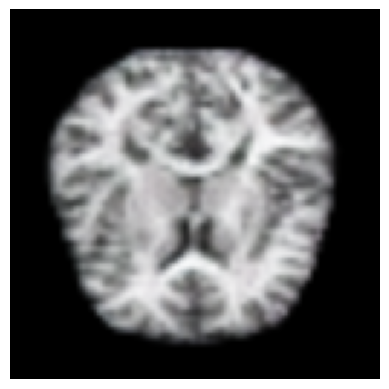

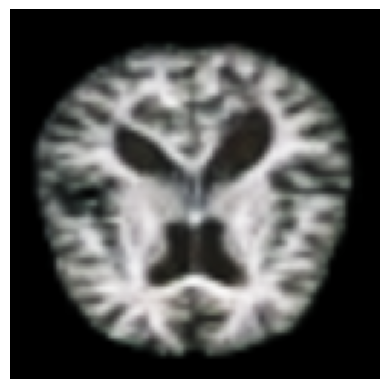

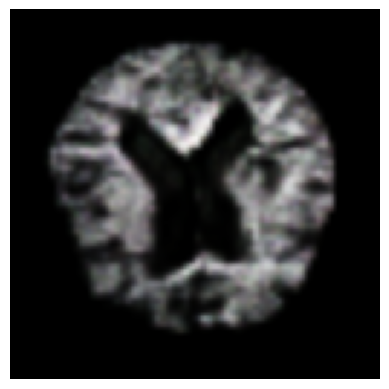

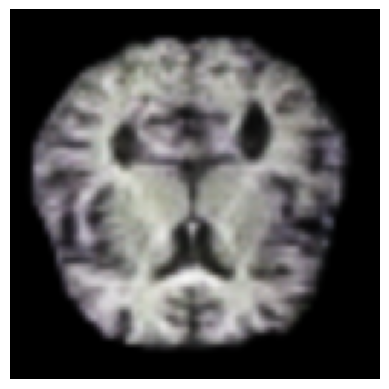

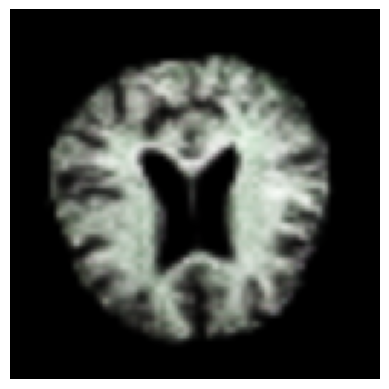

In [4]:
import matplotlib.pyplot as plt

for i in range(5):  # Display the first 5 images
    plt.imshow(preprocessed_dataset[i])
    plt.axis('off')
    plt.show()


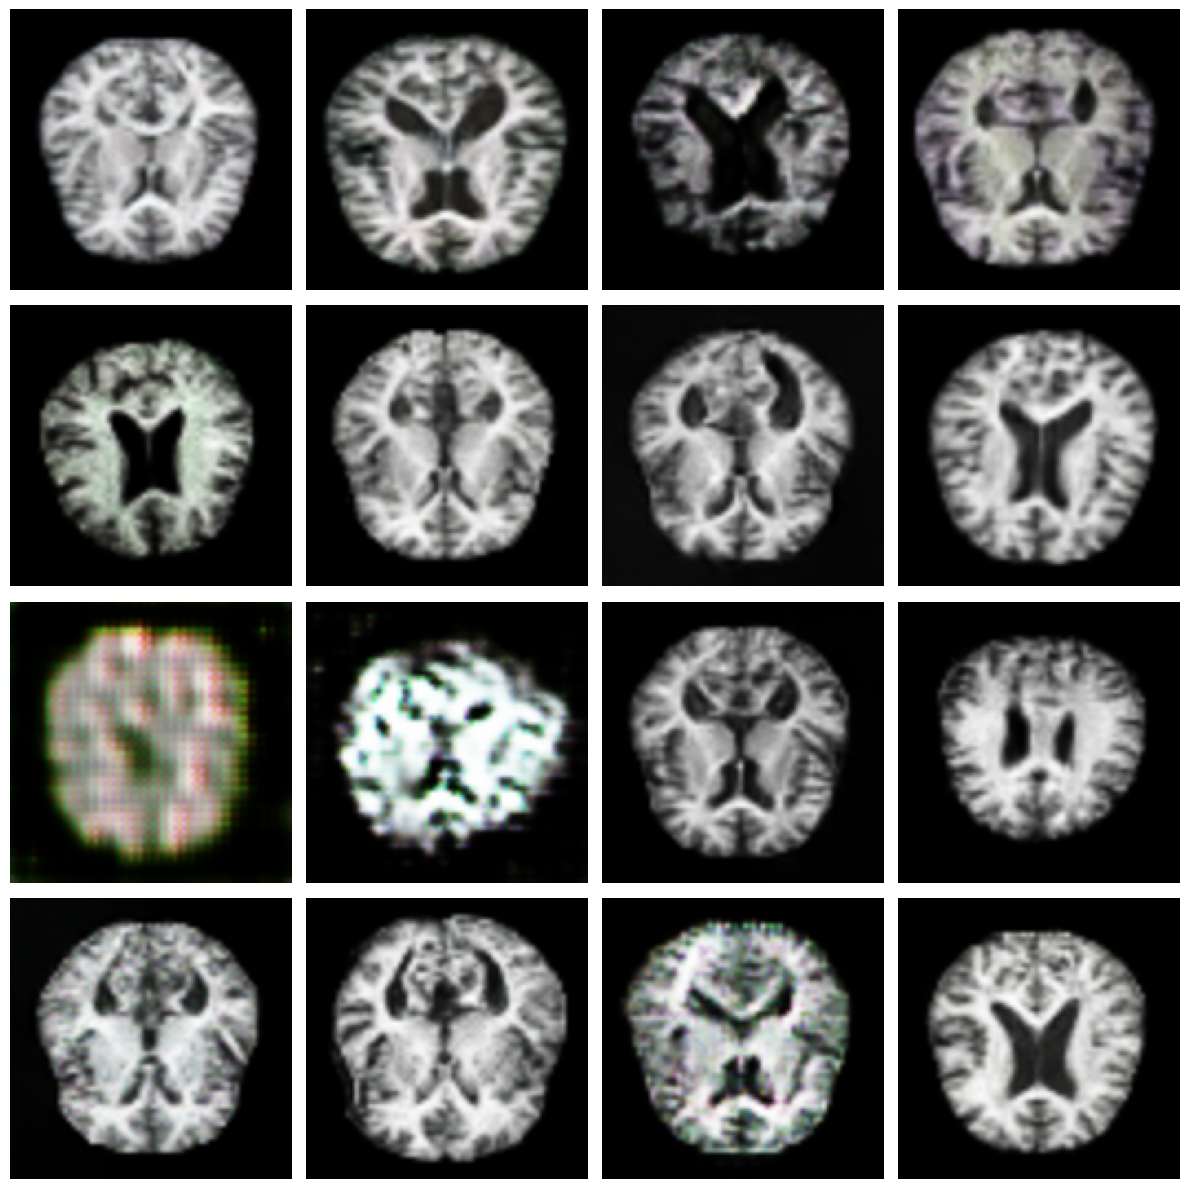

In [5]:
import matplotlib.pyplot as plt

def visualize_images(images, rows=4, cols=4):
    """
    Visualize multiple images in a grid.
    Args:
        images: Array of images to visualize.
        rows: Number of rows in the grid.
        cols: Number of columns in the grid.
    """
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        if i < len(images):
            ax.imshow(images[i])
            ax.axis('off')
        else:
            ax.remove()  # Remove extra subplots if not enough images
    plt.tight_layout()
    plt.show()

# Display the first 16 preprocessed images in a grid
visualize_images(preprocessed_dataset[:16])


In [6]:
# Assuming dataset is loaded as follows:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    augmented_dataset_path,
    label_mode="categorical",  # Ensures labels are one-hot encoded
    image_size=(128, 128),
    batch_size=32
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dataset,
    label_mode="categorical",
    image_size=(128, 128),
    batch_size=32
)

# Extract data and labels
train_images, train_labels = zip(*[(x.numpy(), y.numpy()) for x, y in train_dataset])
train_labels = np.concatenate(train_labels)

test_images, test_labels = zip(*[(x.numpy(), y.numpy()) for x, y in test_dataset])
test_labels = np.concatenate(test_labels)


Found 1000 files belonging to 4 classes.
Found 229 files belonging to 4 classes.


Training Dataset Class Distribution:
Class 0: 300.0
Class 1: 300.0
Class 2: 200.0
Class 3: 200.0


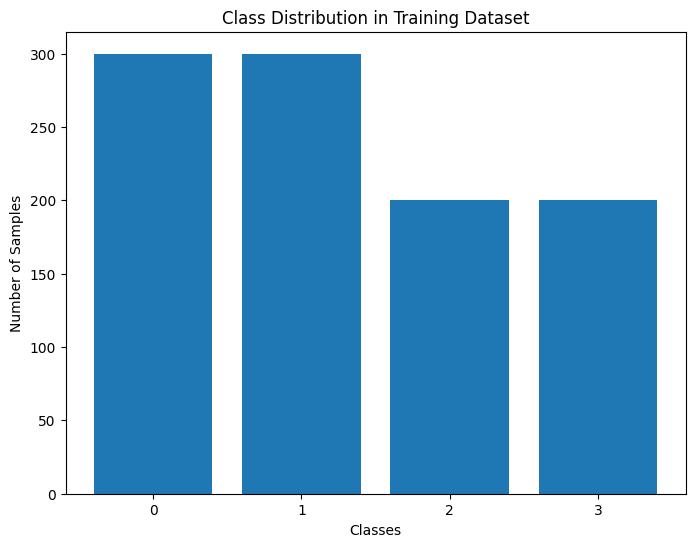


Testing Dataset Class Distribution:
Class 0: 50.0
Class 1: 55.0
Class 2: 62.0
Class 3: 62.0


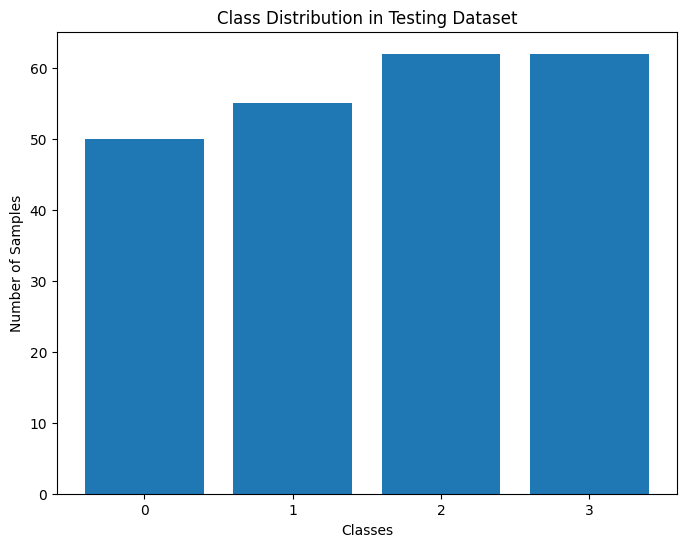

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `train_labels` and `test_labels` are one-hot encoded
# Convert one-hot encoded labels to class indices
train_class_counts = np.sum(train_labels, axis=0)
test_class_counts = np.sum(test_labels, axis=0)

# Plot class distribution for training and testing datasets
def plot_class_distribution(class_counts, dataset_name):
    plt.figure(figsize=(8, 6))
    classes = range(len(class_counts))
    plt.bar(classes, class_counts)
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.title(f'Class Distribution in {dataset_name} Dataset')
    plt.xticks(classes)
    plt.show()

# Check class distribution
print("Training Dataset Class Distribution:")
for i, count in enumerate(train_class_counts):
    print(f"Class {i}: {count}")
plot_class_distribution(train_class_counts, "Training")

print("\nTesting Dataset Class Distribution:")
for i, count in enumerate(test_class_counts):
    print(f"Class {i}: {count}")
plot_class_distribution(test_class_counts, "Testing")
